<a href="https://colab.research.google.com/github/farhaanqazi/F21MP/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statistics

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/farhaanqazi/F21MP/main/dataset.csv'
df = pd.read_csv(url)

In [ ]:
# Define a function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return (z_scores > threshold).any()

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return ((data < lower_bound) | (data > upper_bound)).any()

# Check for outliers in each column
columns_with_outliers_zscore = df.apply(detect_outliers_zscore)
columns_with_outliers_iqr = df.apply(detect_outliers_iqr)

# Print columns with outliers using z-score method
print("Columns with outliers (z-score):")
print(columns_with_outliers_zscore)

# Print columns with outliers using IQR method
print("\nColumns with outliers (IQR):")
print(columns_with_outliers_iqr)

Columns with outliers (z-score):
ID                 False
Dominant           False
Attempts           False
PC                 False
Duration            True
Time                True
AreaError           True
TimeTriangles_1     True
TimeTriangles_2     True
TimeTriangles_3     True
TimeTriangles_4     True
TimeTriangles_5     True
Distance            True
LeaveSurface        True
Side               False
TimeContact         True
ZeroVel             True
ZeroAcc             True
dtype: bool

Columns with outliers (IQR):
ID                 False
Dominant           False
Attempts           False
PC                 False
Duration            True
Time                True
AreaError           True
TimeTriangles_1     True
TimeTriangles_2     True
TimeTriangles_3     True
TimeTriangles_4     True
TimeTriangles_5     True
Distance            True
LeaveSurface        True
Side                True
TimeContact         True
ZeroVel             True
ZeroAcc             True
dtype: bool


In [ ]:
def replace_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    data[z_scores > threshold] = np.nan
    return data

# Check for outliers in each column and replace them with null values
df_with_nulls = df.apply(replace_outliers_zscore)

# Print the dataframe with null values for outliers
df_with_nulls

,ID,Dominant,Attempts,PC,Duration,Time,AreaError,TimeTriangles_1,TimeTriangles_2,TimeTriangles_3,TimeTriangles_4,TimeTriangles_5,Distance,LeaveSurface,Side,TimeContact,ZeroVel,ZeroAcc
0,10,1,1,0,0.0,35.590,111.675922,9957.0,4331.0,5062.0,8047.0,7954.0,5.659210,1.0,1,34.350,3.895,2.795
1,10,1,2,0,0.0,27.735,106.825450,7185.0,5986.0,4701.0,5561.0,5879.0,4.758624,1.0,1,27.710,2.945,2.055
2,10,0,1,0,0.0,29.715,161.018418,7985.0,6858.0,6045.0,4363.0,5043.0,4.857465,2.0,1,29.660,2.120,2.055
3,10,0,2,0,0.0,26.650,116.310537,6564.0,6000.0,4420.0,5327.0,4752.0,4.837145,1.0,1,26.575,1.360,1.430
4,1,1,1,0,0.0,39.665,167.348008,11905.0,6366.0,8245.0,7358.0,8737.0,5.116981,1.0,1,39.650,3.705,4.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,8,0,2,1,1.5,32.150,147.944077,6985.0,6174.0,6903.0,6450.0,5783.0,4.645332,1.0,1,32.105,1.015,3.435
321,9,1,1,1,7.0,33.410,125.701464,10191.0,9231.0,2719.0,6875.0,7719.0,5.839282,2.0,1,29.795,4.725,3.165
322,9,1,2,1,7.0,23.935,117.619378,7644.0,3719.0,5001.0,4640.0,3889.0,4.784715,1.0,1,23.845,3.290,2.170
323,9,0,1,1,7.0,24.750,204.258680,8180.0,5376.0,3889.0,3849.0,4531.0,4.802904,1.0,1,24.680,2.390,2.100


In [ ]:
from sklearn.impute import KNNImputer


# Apply KNN imputation to handle missing values
knn_imputer = KNNImputer()
PDdata_imputed_data = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Print the replaced data
print("Replaced Data:")
print(PDdata_imputed_data)


Replaced Data:
       ID  Dominant  Attempts   PC  Duration    Time   AreaError  \
0    10.0       1.0       1.0  0.0       0.0  35.590  111.675922   
1    10.0       1.0       2.0  0.0       0.0  27.735  106.825450   
2    10.0       0.0       1.0  0.0       0.0  29.715  161.018418   
3    10.0       0.0       2.0  0.0       0.0  26.650  116.310537   
4     1.0       1.0       1.0  0.0       0.0  39.665  167.348008   
..    ...       ...       ...  ...       ...     ...         ...   
320   8.0       0.0       2.0  1.0       1.5  32.150  147.944077   
321   9.0       1.0       1.0  1.0       7.0  33.410  125.701464   
322   9.0       1.0       2.0  1.0       7.0  23.935  117.619378   
323   9.0       0.0       1.0  1.0       7.0  24.750  204.258680   
324   9.0       0.0       2.0  1.0       7.0  22.545  131.566725   

     TimeTriangles_1  TimeTriangles_2  TimeTriangles_3  TimeTriangles_4  \
0             9957.0           4331.0           5062.0           8047.0   
1             7185

In [ ]:
df=PDdata_imputed_data

In [ ]:
 df.drop('Duration', axis=1, inplace=True)
 df.drop('ID', axis=1, inplace=True)

In [ ]:
# # Separate the features and target variable
X = df.drop('PC', axis=1)  # Replace 'target_variable' with the actual column name
y = df['PC']  # Replace 'target_variable' with the actual column name

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA for feature extraction
pca = PCA(n_components=10)  # Specify the desired number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM classifier
model = SVC(probability=True)

# Train the SVM classifier
model.fit(X_train_pca, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test_pca)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


# Apply cross-validation
cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5)  # Perform 5-fold cross-validation
formatted_cv_scores = [f"{score:.4f}" for score in cv_scores]

# Calculate standard deviation
std_dev = statistics.stdev(cv_scores)

# Calculate the average accuracy across all folds
cv_accuracy = cv_scores.mean()

# Calculate training accuracy
y_train_pred = model.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
y_pred = model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)


# Calculate precision, recall, sensitivity, and specificity
precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
true_negative = np.sum((y_pred == 0) & (y_test == 0))
false_positive = np.sum((y_pred == 1) & (y_test == 0))
false_negative = np.sum((y_pred == 0) & (y_test == 1))
true_positive = np.sum((y_pred == 1) & (y_test == 1))
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)



#print all the evaluations
print("---------------------")
print("Model: ", model)

# Print the accuracy scores for each fold
print("---------------------")
print("---------------------")
print(f"Cross-validation scores: ", formatted_cv_scores)
print(f"CV Scores Standard deviation:, {std_dev:.4f}")

print(f"Cross-validation accuracy:, {cv_accuracy:.4f}")
print("---------------------")
print("---------------------")

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Training Accuracy:  {train_accuracy:.4f}"   )
print(f"Testing Accuracy:  {test_accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Sensitivity:  {sensitivity:.4f}")
print(f"Specificity:  {specificity:.4f}")
print("---------------------")
print("---------------------")
print("---------------------")

---------------------
Model:  SVC(probability=True)
---------------------
---------------------
Cross-validation scores:  ['0.7308', '0.7500', '0.6923', '0.7692', '0.7692']
CV Scores Standard deviation:, 0.0322
Cross-validation accuracy:, 0.7423
---------------------
---------------------
Model Accuracy: 0.7231
Training Accuracy:  0.7692
Testing Accuracy:  0.7231
Precision:  0.7018
Sensitivity:  0.9756
Specificity:  0.2917
---------------------
---------------------
---------------------


In [ ]:
from tabulate import tabulate

# ...

# Define the output data as a list of lists
output_data = [
    ["Model:",  model],
    ["Cross-validation scores:", formatted_cv_scores],
    ["CV Scores Standard deviation:", f"{std_dev:.4f}"],
    ["Cross-validation accuracy:", f"{cv_accuracy:.4f}"],
    ["Model Accuracy:", f"{test_accuracy:.4f}"],
    ["Training Accuracy:", f"{train_accuracy:.4f}"],
    ["Testing Accuracy:", f"{test_accuracy:.4f}"],
    ["Precision:", f"{precision:.4f}"],
    ["Sensitivity:", f"{sensitivity:.4f}"],
    ["Specificity:", f"{specificity:.4f}"]
]

# Tabulate the output data
table = tabulate(output_data, headers=["Description", "Value"], tablefmt="fancy_grid")

# Print the tabble
print(table)


╒═══════════════════════════════╤════════════════════════════════════════════════════╕
│ Description                   │ Value                                              │
╞═══════════════════════════════╪════════════════════════════════════════════════════╡
│ Model:                        │ SVC(probability=True)                              │
├───────────────────────────────┼────────────────────────────────────────────────────┤
│ Cross-validation scores:      │ ['0.7308', '0.7500', '0.6923', '0.7692', '0.7692'] │
├───────────────────────────────┼────────────────────────────────────────────────────┤
│ CV Scores Standard deviation: │ 0.0322                                             │
├───────────────────────────────┼────────────────────────────────────────────────────┤
│ Cross-validation accuracy:    │ 0.7423                                             │
├───────────────────────────────┼────────────────────────────────────────────────────┤
│ Model Accuracy:               │ 0.7231   

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


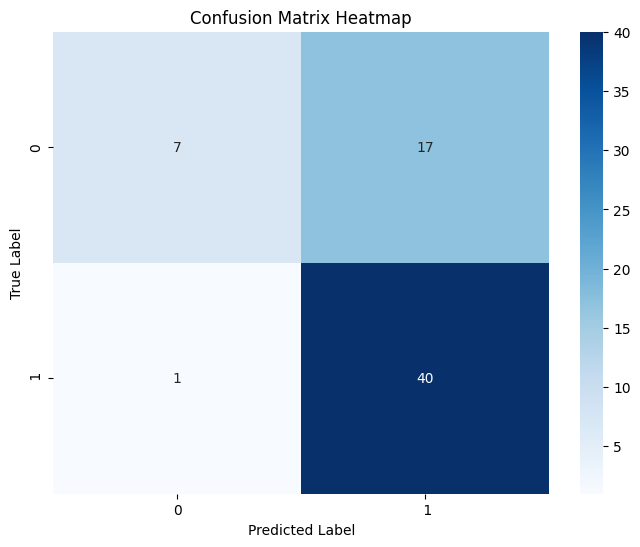

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... Your existing code ...

# Predict the labels for the test data
y_pred = model.predict(X_test_pca)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels for your dataset
class_labels = ['0', ' 1']  # Replace with your actual class labels

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


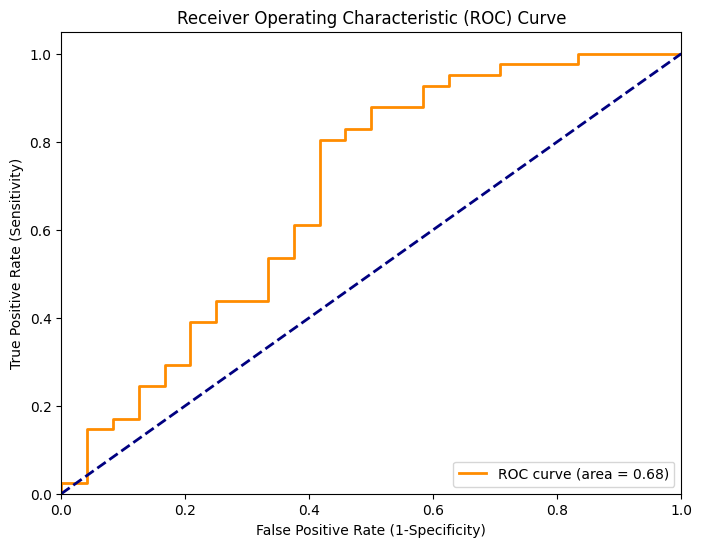

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 5: Make predictions on the test set
y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

# Step 6: Calculate the ROC curve and plot it
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

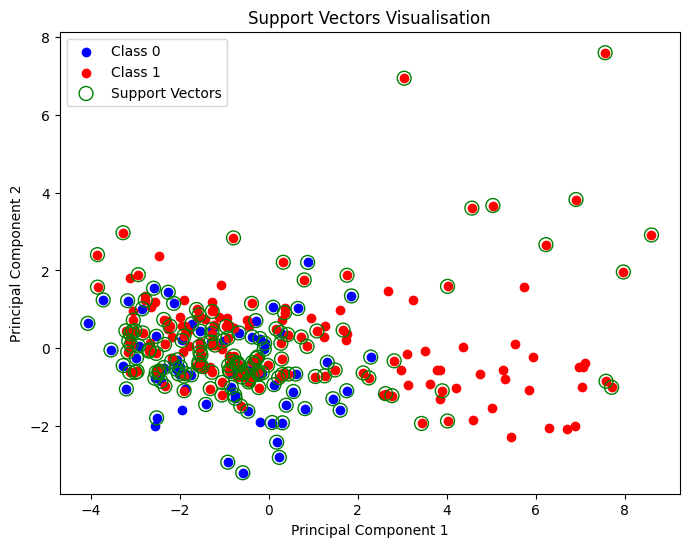

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Your existing code for splitting data, creating the SVM model, feature scaling, PCA, training, and evaluation

# Get the support vectors from the trained model
support_vectors = model.support_vectors_

# Plot the support vectors along with the data points
plt.figure(figsize=(8, 6))

# Plot data points from class 0 (negative class)
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='blue', label='Class 0')

# Plot data points from class 1 (positive class)
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='red', label='Class 1')

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='green', label='Support Vectors')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Support Vectors Visualisation')
plt.legend()
plt.show()


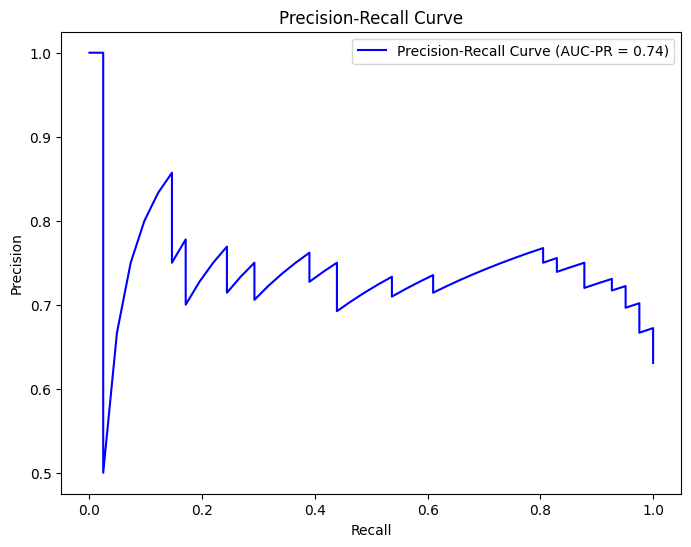

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, auc

# Your existing code for splitting data, creating the SVM model, feature scaling, PCA, training, and evaluation

# Get the predicted probabilities for the positive class (class 1) from the SVM model
y_prob = model.decision_function(X_test_pca)

# Calculate the precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the area under the Precision-Recall curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'Precision-Recall Curve (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


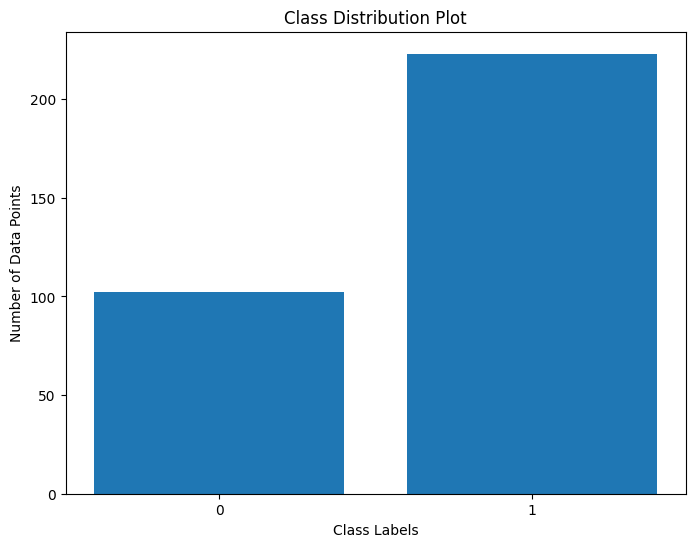

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y' contains the class labels
# Replace 'y' with your actual class labels

# Calculate the number of data points in each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes)
plt.xlabel('Class Labels')
plt.ylabel('Number of Data Points')
plt.title('Class Distribution Plot')
plt.show()


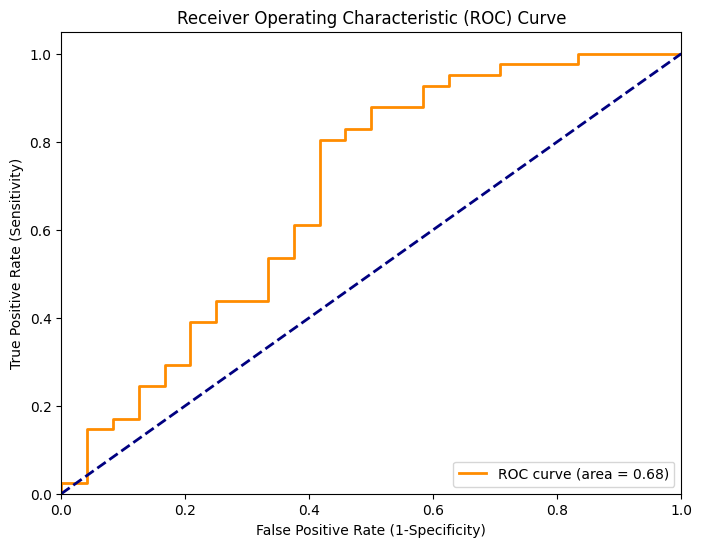

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Make predictions on the test set
#y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

#Calculate the ROC curve and plot it
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()